## **EV Batteries Health**

### **Dataset Summary:**
- Total Entries: 15,064
- Total Features: 9
- No Missing Values: All columns have complete data.

### **Data Types:**
- 8 numerical columns (float64)
- 1 integer column (RUL - Remaining Useful Life)

### **Feature Information:**

- Cycle_Index – The cycle number of battery usage.
- Discharge Time (s) – Time taken for battery discharge in seconds.
- Decrement 3.6-3.4V (s) – Time duration for voltage decrement between 3.6V and 3.4V.
- Max. Voltage Dischar. (V) – Maximum voltage during discharge.
- Min. Voltage Charg. (V) – Minimum voltage during charging.
- Time at 4.15V (s) – Time spent at 4.15V voltage level.
- Time constant current (s) – Time spent in constant current charging phase.
- Charging time (s) – Total charging time in seconds.
- RUL (Remaining Useful Life) – Target variable representing battery's remaining lifespan in cycles.

### **1.Importing Libraries**


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error,classification_report,r2_score,mean_squared_error
from sklearn.preprocessing import StandardScaler
# import xgboost as xgb
import warnings
warnings.filterwarnings('ignore')

### **2.Data Loading and Understanding**

In [2]:
data = pd.read_csv("Battery_RUL.csv")
data.head()

,Cycle_Index,Discharge Time (s),Decrement 3.6-3.4V (s),Max. Voltage Dischar. (V),Min. Voltage Charg. (V),Time at 4.15V (s),Time constant current (s),Charging time (s),RUL
0,1.0,2595.30,1151.488500,3.670,3.211,5460.001,6755.01,10777.82,1112
1,2.0,7408.64,1172.512500,4.246,3.220,5508.992,6762.02,10500.35,1111
2,3.0,7393.76,1112.992000,4.249,3.224,5508.993,6762.02,10420.38,1110
3,4.0,7385.50,1080.320667,4.250,3.225,5502.016,6762.02,10322.81,1109
4,6.0,65022.75,29813.487000,4.290,3.398,5480.992,53213.54,56699.65,1107


### **3. Descriptive Stats & EDA**

In [3]:
data.shape 

(15064, 9)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15064 entries, 0 to 15063
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Cycle_Index                15064 non-null  float64
 1   Discharge Time (s)         15064 non-null  float64
 2   Decrement 3.6-3.4V (s)     15064 non-null  float64
 3   Max. Voltage Dischar. (V)  15064 non-null  float64
 4   Min. Voltage Charg. (V)    15064 non-null  float64
 5   Time at 4.15V (s)          15064 non-null  float64
 6   Time constant current (s)  15064 non-null  float64
 7   Charging time (s)          15064 non-null  float64
 8   RUL                        15064 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 1.0 MB


In [5]:
data.describe()

,Cycle_Index,Discharge Time (s),Decrement 3.6-3.4V (s),Max. Voltage Dischar. (V),Min. Voltage Charg. (V),Time at 4.15V (s),Time constant current (s),Charging time (s),RUL
count,15064.000000,15064.000000,15064.000000,15064.000000,15064.000000,15064.000000,15064.000000,15064.000000,15064.000000
mean,556.155005,4581.273960,1239.784672,3.908176,3.577904,3768.336171,5461.266970,10066.496204,554.194172
std,322.378480,33144.012077,15039.589269,0.091003,0.123695,9129.552477,25155.845202,26415.354121,322.434514
min,1.000000,8.690000,-397645.908000,3.043000,3.022000,-113.584000,5.980000,5.980000,0.000000
25%,271.000000,1169.310000,319.600000,3.846000,3.488000,1828.884179,2564.310000,7841.922500,277.000000
50%,560.000000,1557.250000,439.239471,3.906000,3.574000,2930.203500,3824.260000,8320.415000,551.000000
75%,833.000000,1908.000000,600.000000,3.972000,3.663000,4088.326500,5012.350000,8763.282500,839.000000
max,1134.000000,958320.370000,406703.768000,4.363000,4.379000,245101.117000,880728.100000,880728.100000,1133.000000


In [6]:
data.isnull().sum()

Cycle_Index                  0
Discharge Time (s)           0
Decrement 3.6-3.4V (s)       0
Max. Voltage Dischar. (V)    0
Min. Voltage Charg. (V)      0
Time at 4.15V (s)            0
Time constant current (s)    0
Charging time (s)            0
RUL                          0
dtype: int64

In [7]:
Numarical_col = data.select_dtypes('Float64','int64').columns

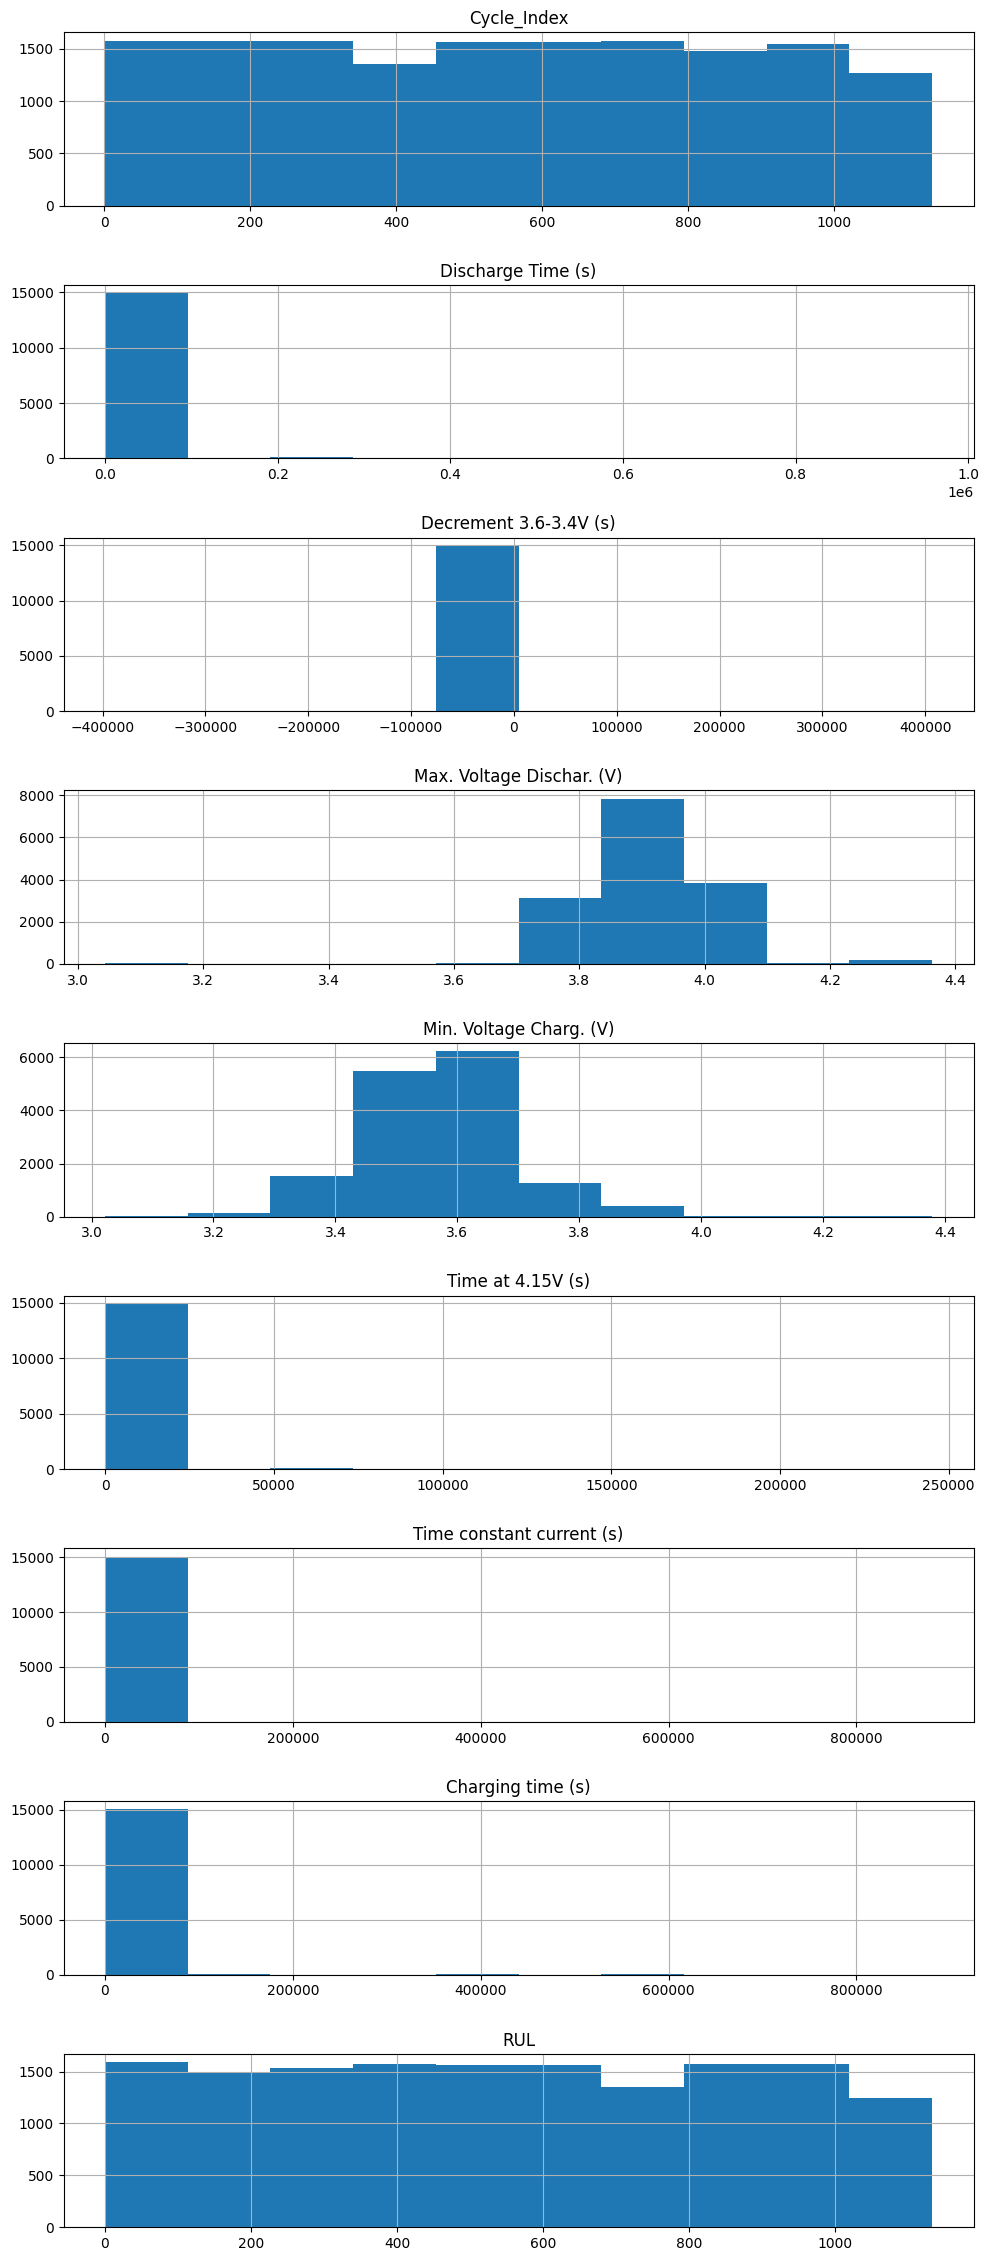

In [8]:
# Data Distribution (Univariate Analysis)
plt.figure(figsize=(10, 25))

for i, j in enumerate(data.columns):

    if data[j].dtype == 'O':
        plt.subplot(10, 1, i + 1)
        plt.title(j)
        plt.bar(data[j].value_counts().keys(), data[j].value_counts().values)
    else:
        plt.subplot(10, 1, i + 1)
        plt.title(j)
        data[j].hist()

plt.tight_layout()

<Axes: >

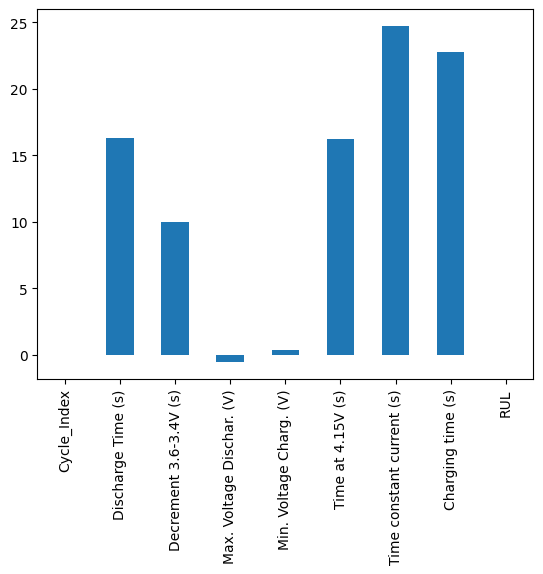

In [9]:
num = data.select_dtypes('number')

num.skew().plot(kind='bar')

#### **Correlation Heatmap for numarical columns**

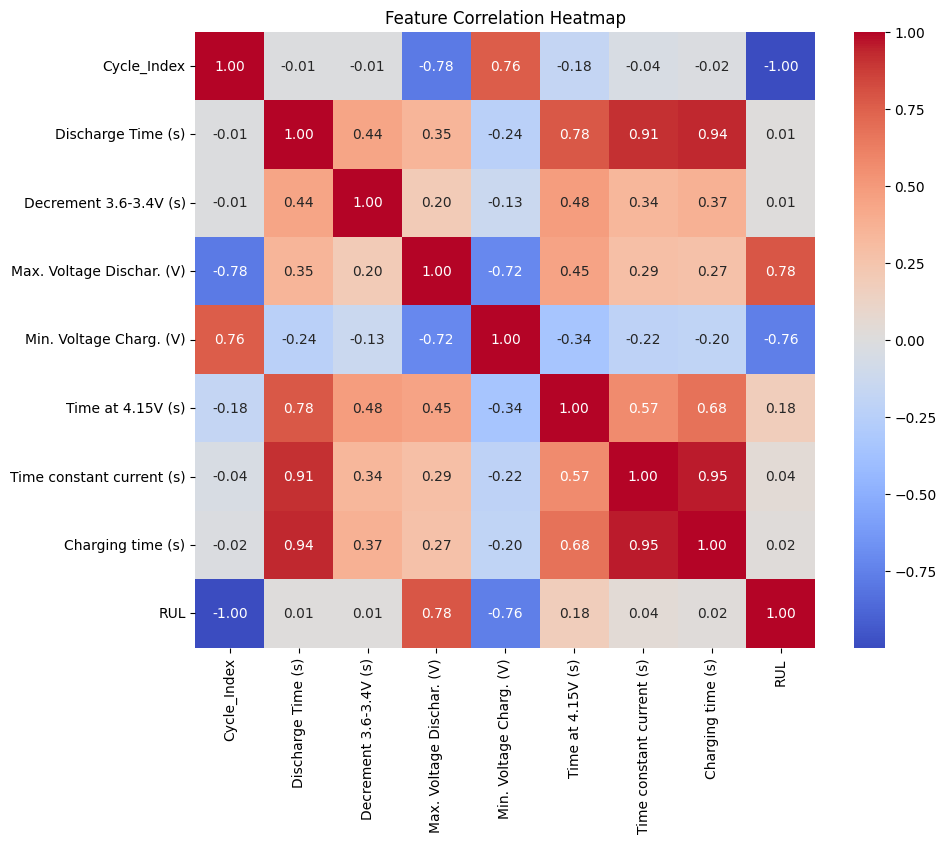

RUL                          1.000000
Cycle_Index                  0.999756
Max. Voltage Dischar. (V)    0.782800
Min. Voltage Charg. (V)      0.759805
Time at 4.15V (s)            0.176514
Time constant current (s)    0.040675
Charging time (s)            0.018299
Decrement 3.6-3.4V (s)       0.011998
Discharge Time (s)           0.011957
Name: RUL, dtype: float64


In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
corr_matrix = data.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

# Selecting highly correlated features with RUL
important_features = corr_matrix["RUL"].abs().sort_values(ascending=False)
print(important_features)


#### **Box Plot**

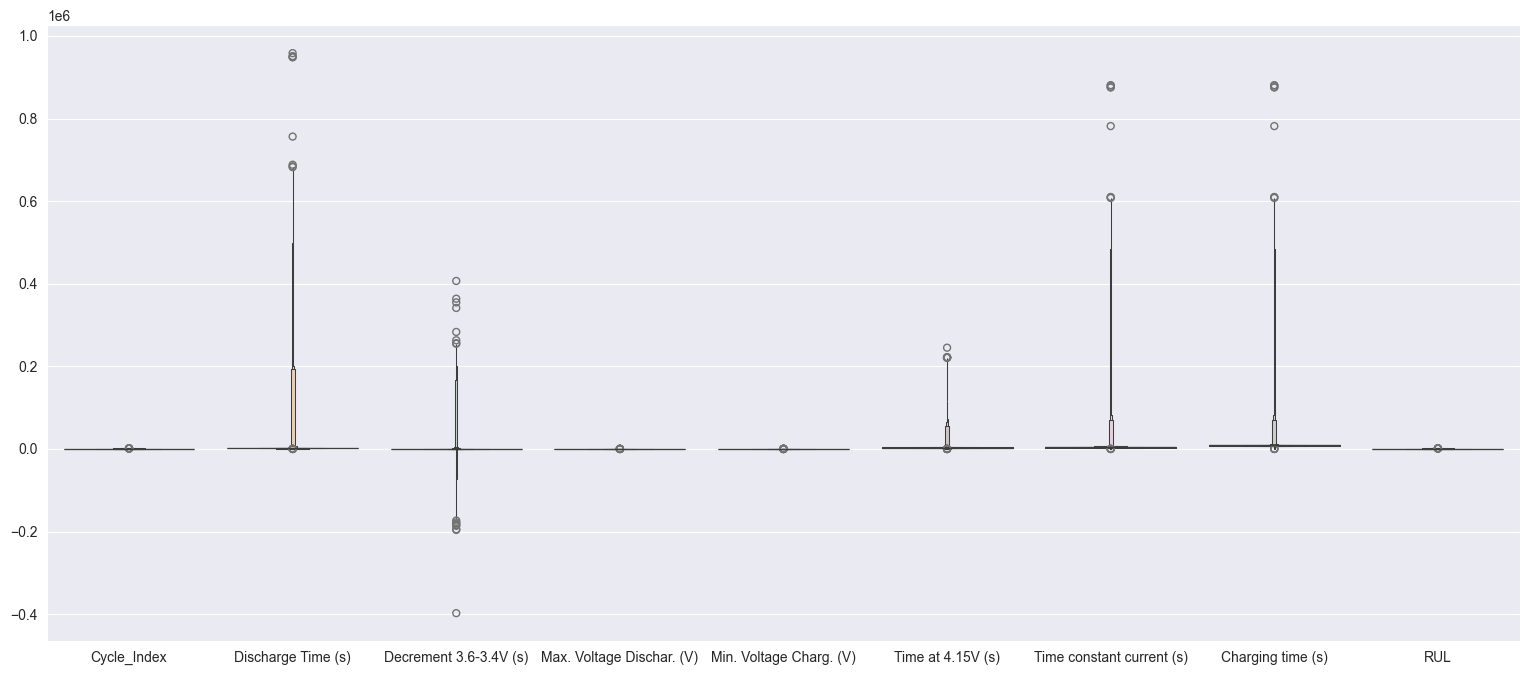

In [11]:
plt.figure(figsize=(19,8))
sns.set_style('darkgrid')
sns.boxenplot(data=data)
plt.show()

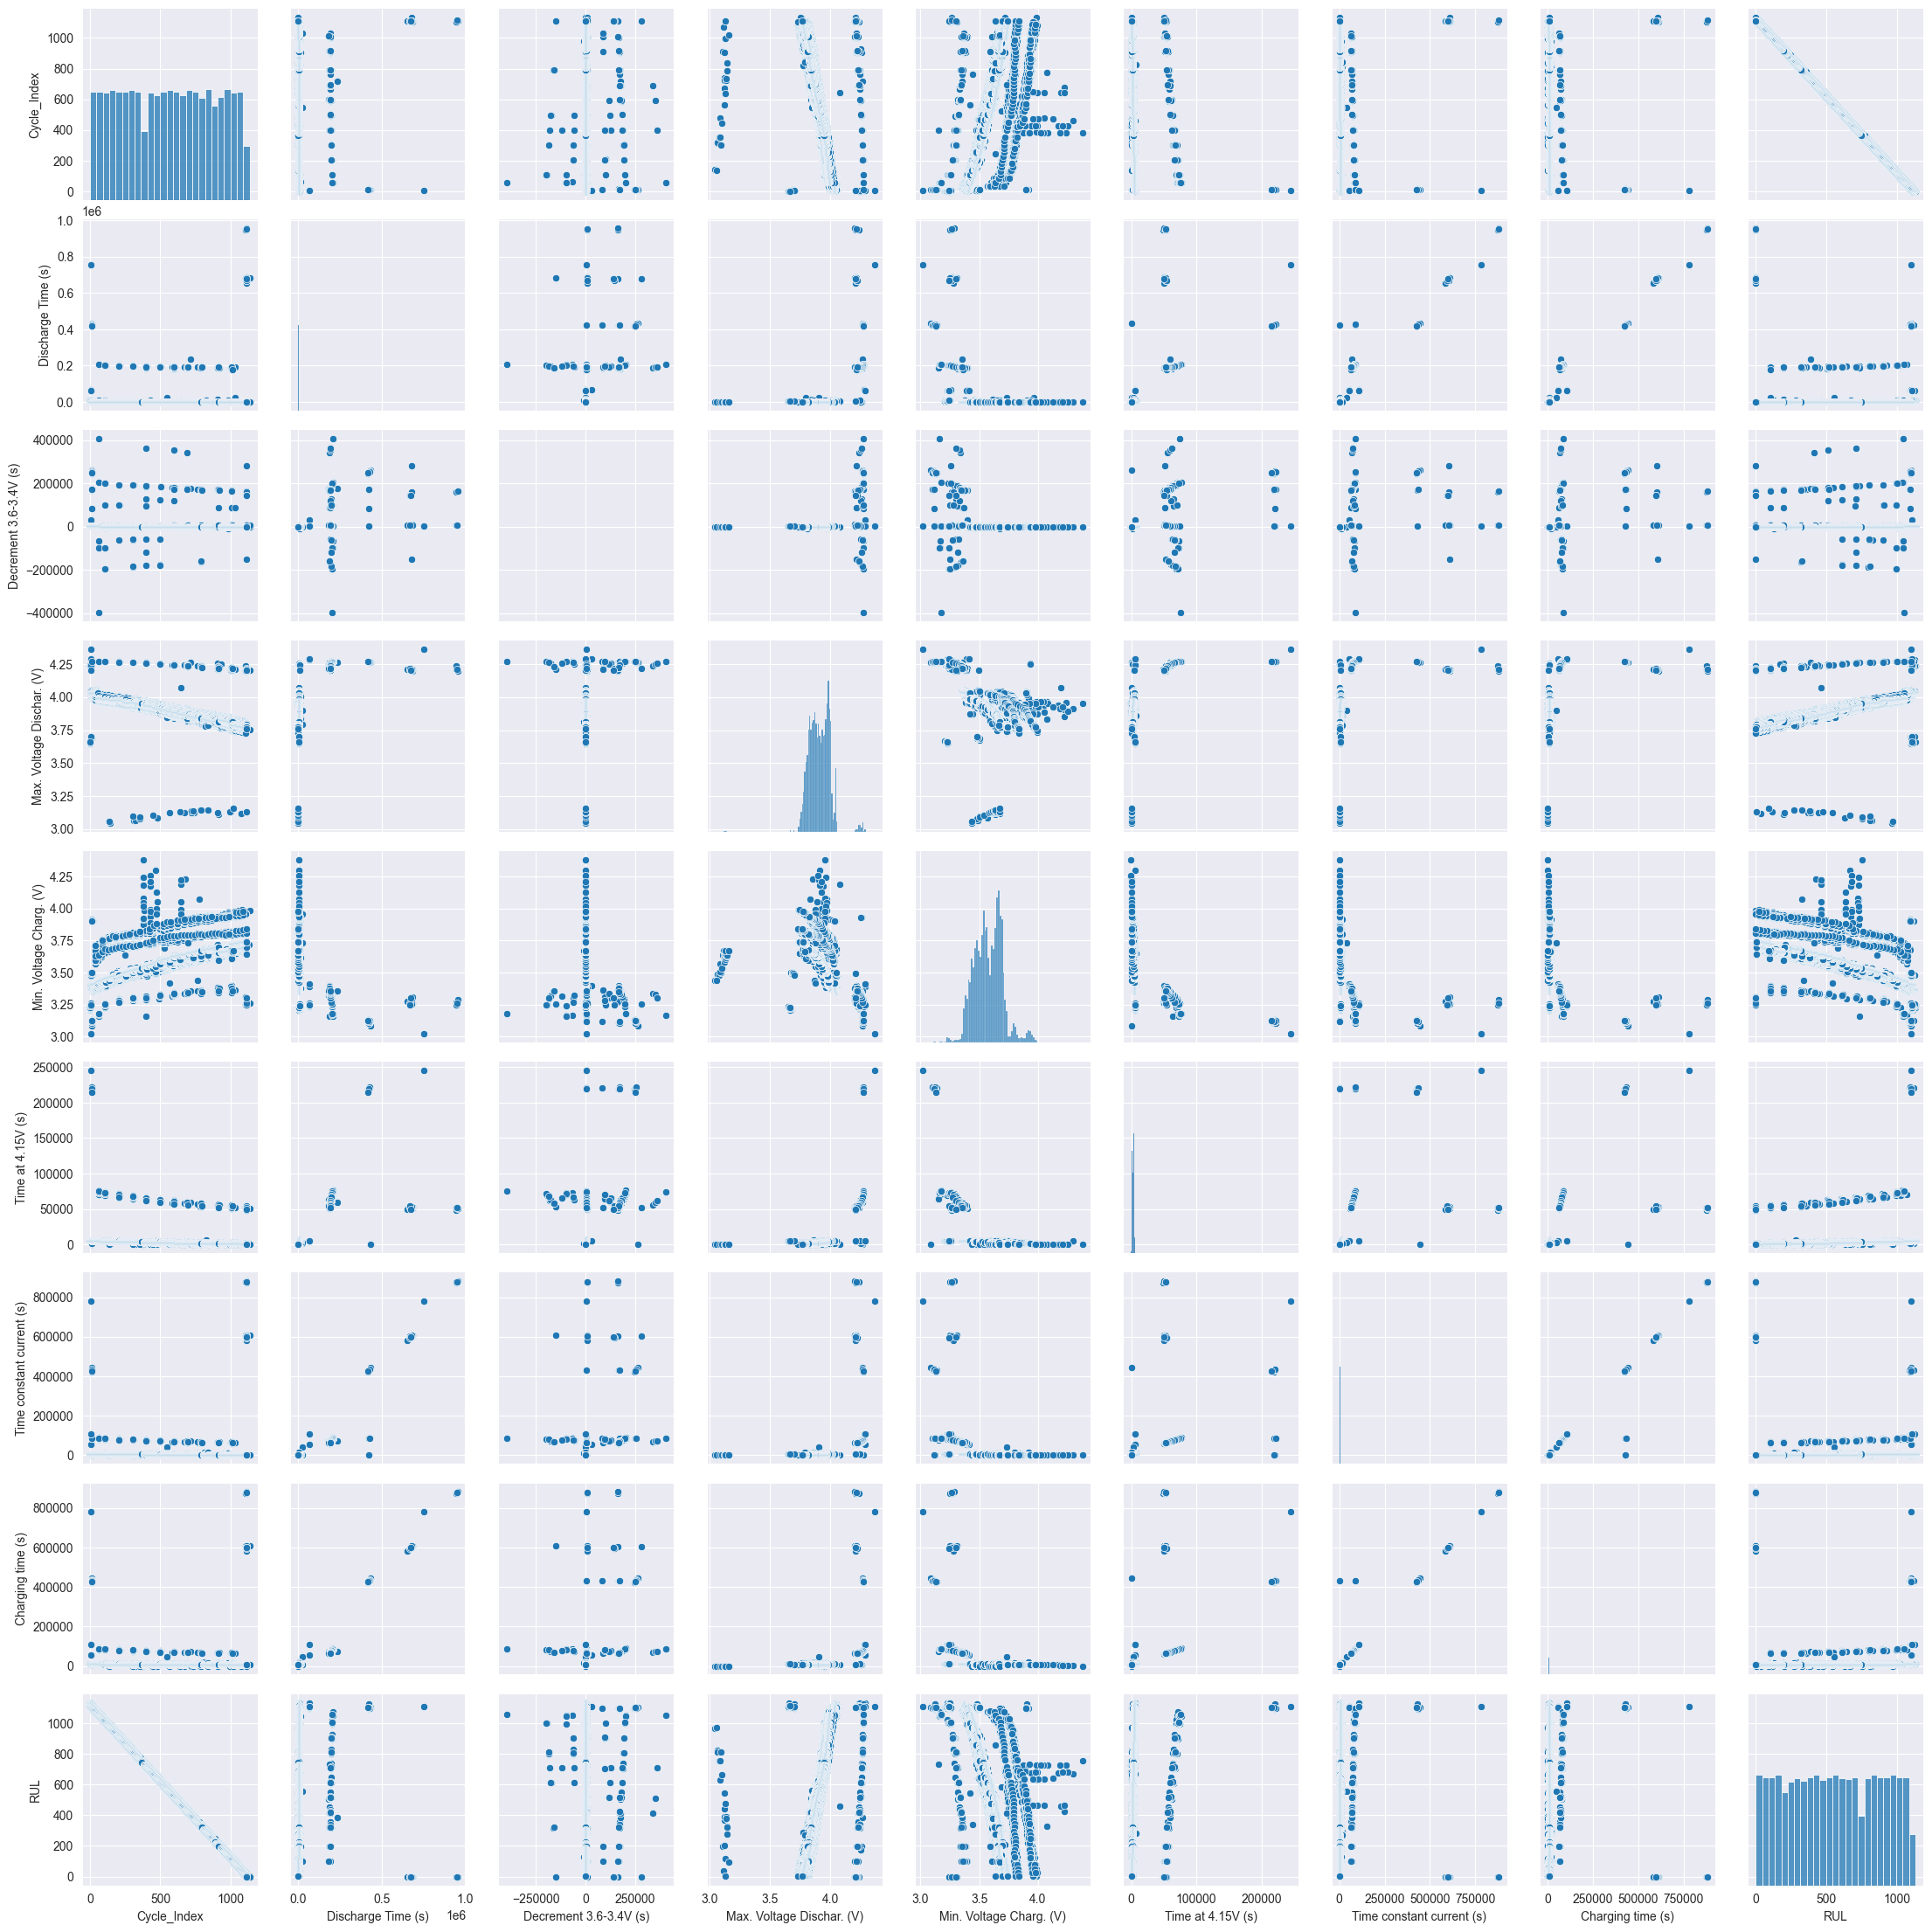

In [12]:
sns.pairplot(data=data)
plt.show()

#### **Outliers**

In [13]:
def remove_outliers(data, columns):
  for col in columns:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1

    #Define outlier boundries
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]

  return data

if data is not None:
  num_col = data.select_dtypes('number').columns
  data = remove_outliers(data, num_col)
else:
  print("data is None")

data_new=remove_outliers(data,num_col)

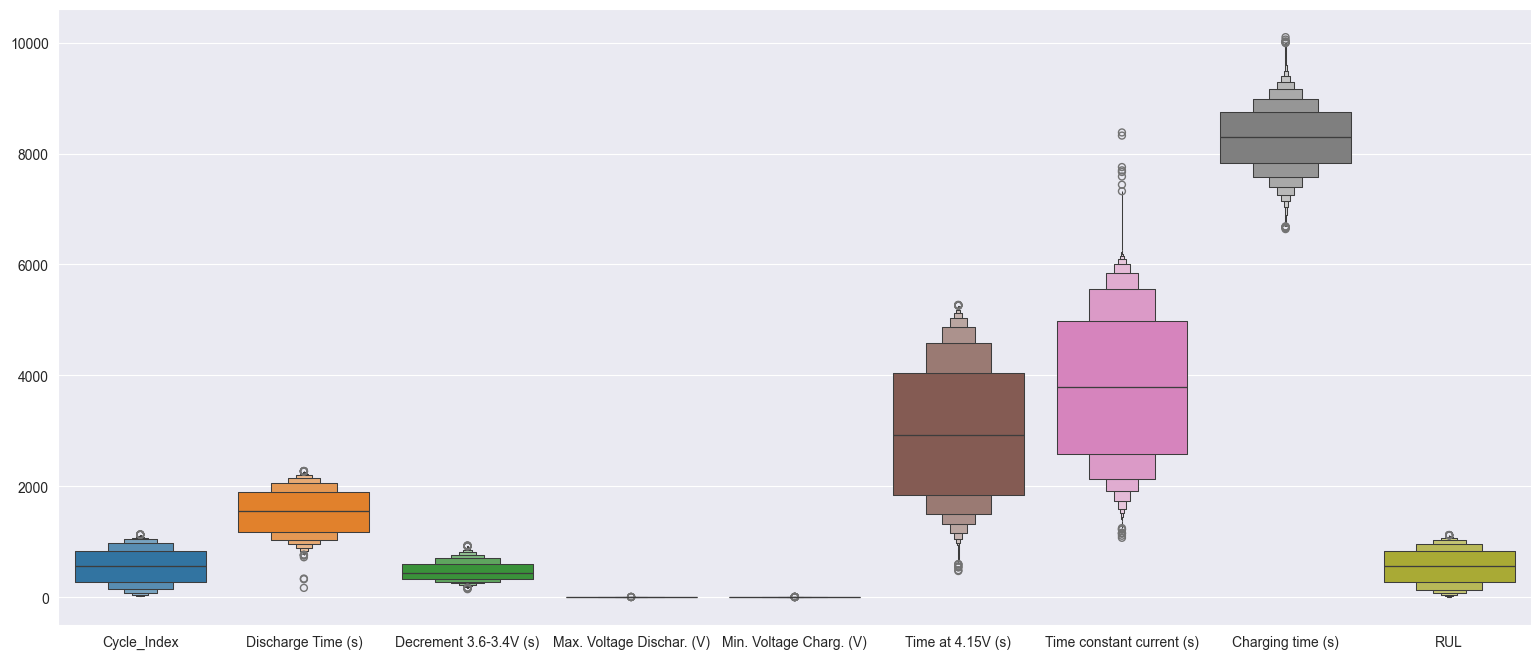

In [14]:
# Remove outliers
plt.figure(figsize=(19,8))
sns.set_style('darkgrid')
sns.boxenplot(data=data_new)
plt.show()

### **Training And Testing Data**

In [15]:
from sklearn.model_selection import train_test_split

# Separate features and target
X = data.drop(columns=["RUL"])  # Drop target column
y = data["RUL"]

# Split into training & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [16]:
X_train.shape,X_test.shape, y_train.shape, y_test.shape

((11536, 8), (2885, 8), (11536,), (2885,))

In [17]:
# Apply scaling
scaler = StandardScaler()  # Choose StandardScaler, MinMaxScaler, or RobustScaler
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)  # Use transform (not fit_transform) on test data

# Save the scaler
import joblib
joblib.dump(scaler, "scaler.pkl")
print("Scaler saved successfully!")

Scaler saved successfully!


In [18]:
X_train_scaled.shape, X_test.shape

((11536, 8), (2885, 8))

### **Model Building**

#### **1.Linear Regression**

In [19]:
# Using Regression
lr = LinearRegression()
model = lr.fit(X_train_scaled,y_train)


In [20]:
#for linear regression
y_pred = lr.predict(X_test_scaled)


# Evaluate model performance linear regression
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R² Score: {r2}")

Mean Absolute Error (MAE): 4.376348102475808
Root Mean Squared Error (RMSE): 6.896925900257065
R² Score: 0.9995250736607292


#### **2. Random Forest**

In [21]:
#Using Random forest
rf = RandomForestRegressor(n_estimators=100,random_state=42)
rf.fit(X_train_scaled,y_train)


#for Random forest
y_pred_rf = rf.predict(X_test_scaled)

#Random Forest
mae = mean_absolute_error(y_test, y_pred_rf)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2 = r2_score(y_test, y_pred_rf)


print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R² Score: {r2}")

Mean Absolute Error (MAE): 1.9355771230502599
Root Mean Squared Error (RMSE): 3.4300889933935608
R² Score: 0.9998825302858542


### **3. Descion Tree**

In [22]:
Dt = DecisionTreeRegressor(max_depth=10,random_state=42)
Dt.fit(X_train_scaled,y_train)

DecisionTreeRegressor(max_depth=10, random_state=42)

In [23]:
#make Prediction
y_pred_Dt = Dt.predict(X_test_scaled)

#Evaluation performance
mae = mean_absolute_error(y_test, y_pred_Dt)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_Dt))
r2 = r2_score(y_test, y_pred_Dt)


print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R² Score: {r2}")

Mean Absolute Error (MAE): 3.328128588077726
Root Mean Squared Error (RMSE): 5.524848862683699
R² Score: 0.9996952414208946


In [24]:
# Save the trainded model in picke file
import pickle

model_data = {"model":rf, "fetures_name":X.columns.to_list()}
with open("EV Battery Health(RUL).pkl","wb") as f:
    pickle.dump(model_data,f)

### **Load the model and Build a predictive system**

In [25]:
with open("EV Battery Health(RUL).pkl", "rb") as f:
    model_data = pickle.load(f)
    
loaded_model = model_data["model"]
featurs_name = model_data["fetures_name"]

In [26]:
print(loaded_model)

RandomForestRegressor(random_state=42)


In [27]:
print(featurs_name)

['Cycle_Index', 'Discharge Time (s)', 'Decrement 3.6-3.4V (s)', 'Max. Voltage Dischar. (V)', 'Min. Voltage Charg. (V)', 'Time at 4.15V (s)', 'Time constant current (s)', 'Charging time (s)']


In [28]:
import numpy as np
import pandas as pd

# Define new battery data as dictionary
new_data = {
    "Cycle_Index": [1.0],
    "Discharge Time (s)": [2595.3],
    "Decrement 3.6-3.4V (s)": [1151.4885],
    "Max. Voltage Dischar. (V)": [3.67],
    "Min. Voltage Charg. (V)": [3.211],
    "Time at 4.15V (s)": [5460.001],
    "Time constant current (s)": [6755.01],
    "Charging time (s)": [10777.82]
}

# Convert dictionary to DataFrame
new_df = pd.DataFrame(new_data)

# Apply the same scaling used in training
new_scaled = scaler.transform(new_df)  # Ensure 'scaler' is the same as used before

# Predict RUL using the trained model
predicted_rul = rf.predict(new_scaled)  # Ensure 'rf_model' is your trained model

print(f"Predicted Remaining Useful Life (RUL): {predicted_rul[0]}")


Predicted Remaining Useful Life (RUL): 1097.26
